This notebook is concerned with analyzing the co-occurrance networks of terms

In [134]:
%cd twitteranalysis
import pandas as pd
import numpy as np
import networkx as nx

#Plotting 
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%config InlineBackend.figure_format = 'svg'

import environment
from DataTools import DataRepositories as DR
# from DataTools import DataConnections as DC
# from DataTools.WordORM import Word
# from DataTools.TweetORM import Users as User
# from DataTools.TweetORM import Tweet
from SearchTools.WordMaps import get_adjacent_word_counts, get_adjacent_words, get_user_ids_for_word

def make_term_ids_filepath(term, path=environment.LOG_FOLDER_PATH):
    return "%s/temp_output/tweet-ids/%s-ids.csv" % (path, term)

EXP_TERMS_FILEPATH = '%s/experimental-terms.xlsx' % environment.EXPERIMENTS_FOLDER
IDS_FILEPATH = "%s/temp_output/user-ids.xlsx" % environment.LOG_FOLDER_PATH


# load in terms to search for
experimentalTerms = pd.read_excel(EXP_TERMS_FILEPATH, sheet_name='terms', squeeze=True)
termMap = pd.read_excel(EXP_TERMS_FILEPATH, sheet_name='mapping')

terms = [t for t in termMap.T.index]

(bookmark:twitteranalysis) -> /Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis
/Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis


In [58]:
def create_term_network(terms):
    """
    Returns a list of tuples containing unique, unordered combinations
    of two terms
    terms = ['a', 'b', 'c']
    expect = [ ('a', 'b'), ('a', 'c'),('b', 'c')]
    assert(create_term_network(terms) == expect)
    
    """
    network = []
    i = 0
    for term in terms:
        i +=1
        [network.append((term, term2)) for term2 in terms[i:]]
        
    return network
        

terms = ['a', 'b', 'c']
expect = [ ('a', 'b'), ('a', 'c'),('b', 'c')]
assert(create_term_network(terms) == expect)

# Hashtag co-occurrance

Finding co-occurrance networks in the separately stored hashtags and tweetsXtags tables

## Determine whether a term has been used as a hashtag

In [ ]:
def get_hashtag_id(term):
    query = """SELECT tagID FROM hashtags WHERE hashtag = %s""" % term

def get_count_of_tweets_containing_hashtag(term):
    query = """SELECT h.hashtag, h.tagID, count(DISTINCT x.tweetID) AS tweetCount 
    FROM hashtags h 
    INNER JOIN tweetsXtags x ON (h.tagID = x.tagID)
    WHERE h.hashtag = %s;""" % term

def get_count_of_tweets_containing_two_hashtags(term1, term2):
    query = """
        SELECT count(DISTINCT x.tweetID) 
        FROM tweetsXtags x 
        INNER JOIN (
            SELECT x1.tweetID AS id 
                FROM tweetsXtags x1 
                INNER JOIN (
                    SELECT tagID AS id 
                    FROM hashtags 
                    WHERE hashtag = %s
                    ) AS t1 
                    ON (x1.tagID = t1.id)
            ) AS t3
            ON x.tweetID = t3.id
        INNER JOIN (
          SELECT x2.tweetID AS id 
                FROM tweetsXtags x2 
                INNER JOIN (
                    SELECT tagID AS id 
                    FROM hashtags 
                    WHERE hashtag = %s
                ) AS t1 
                ON (x2.tagID = t1.id)
        ) AS t4
        ON x.tweetID = t4.id """ % (term1, term2)

In [7]:
create_node_network(experimentalTerms.tolist())

[('rsd', 'c.r.p.s.'),
 ('rsd', 'r.s.d.'),
 ('rsd', 'complex regional pain syndrome'),
 ('rsd', 'reflex sympathetic dystrophy'),
 ('rsd', 'migraine'),
 ('rsd', 'migraineur'),
 ('rsd', 'fibromyalgia'),
 ('rsd', 'fibro'),
 ('rsd', 'fm'),
 ('rsd', 'fms'),
 ('rsd', 'spoonie'),
 ('rsd', 'vulvodynia'),
 ('rsd', 'vulvadynia'),
 ('rsd', 'endometriosis'),
 ('rsd', 'endometriosis'),
 ('rsd', 'neuropathy'),
 ('rsd', 'arthritis'),
 ('rsd', 'oa'),
 ('rsd', 'ra'),
 ('rsd', 'shingles'),
 ('rsd', 'phn'),
 ('rsd', 'post-herpetic neuralgia'),
 ('rsd', 'back pain'),
 ('rsd', 'backpain'),
 ('rsd', 'headache'),
 ('c.r.p.s.', 'r.s.d.'),
 ('c.r.p.s.', 'complex regional pain syndrome'),
 ('c.r.p.s.', 'reflex sympathetic dystrophy'),
 ('c.r.p.s.', 'migraine'),
 ('c.r.p.s.', 'migraineur'),
 ('c.r.p.s.', 'fibromyalgia'),
 ('c.r.p.s.', 'fibro'),
 ('c.r.p.s.', 'fm'),
 ('c.r.p.s.', 'fms'),
 ('c.r.p.s.', 'spoonie'),
 ('c.r.p.s.', 'vulvodynia'),
 ('c.r.p.s.', 'vulvadynia'),
 ('c.r.p.s.', 'endometriosis'),
 ('c.r.p.s.'

# Tweet word_map co-occcurrance

Finding co-occurance networks in the tweet data stored in word_maps

In [62]:

def load_tweet_id_data(term):
    return pd.read_csv(make_term_ids_filepath(term), names=['idx', 'id']) #.drop('idx', axis=1)

def get_cooccurences(term1, term2):
    d1 = load_tweet_id_data(term1)
    d2 = load_tweet_id_data(term2)
    return (term1, term2, len(d1[d1.id.isin(d2.id)]))


In [75]:
terms = [t for t in termMap.T.index]
network = create_term_network(terms)

In [76]:
edges = [get_cooccurences(t1, t2) for t1, t2 in network]

In [78]:
edges

[('crps', 'migraine', 1072),
 ('crps', 'fibromyalgia', 18069),
 ('crps', 'spoonie', 16795),
 ('crps', 'vulvodynia', 8),
 ('crps', 'endometriosis', 77),
 ('crps', 'neuropathy', 1529),
 ('crps', 'arthritis', 1359),
 ('crps', 'rhem_arthritis', 2039),
 ('crps', 'shingles', 63),
 ('crps', 'backpain', 840),
 ('crps', 'headache', 69),
 ('migraine', 'fibromyalgia', 7148),
 ('migraine', 'spoonie', 11184),
 ('migraine', 'vulvodynia', 13),
 ('migraine', 'endometriosis', 388),
 ('migraine', 'neuropathy', 212),
 ('migraine', 'arthritis', 74851),
 ('migraine', 'rhem_arthritis', 375),
 ('migraine', 'shingles', 101),
 ('migraine', 'backpain', 944),
 ('migraine', 'headache', 135803),
 ('fibromyalgia', 'spoonie', 86320),
 ('fibromyalgia', 'vulvodynia', 51),
 ('fibromyalgia', 'endometriosis', 3383),
 ('fibromyalgia', 'neuropathy', 4491),
 ('fibromyalgia', 'arthritis', 22229),
 ('fibromyalgia', 'rhem_arthritis', 8262),
 ('fibromyalgia', 'shingles', 224),
 ('fibromyalgia', 'backpain', 3671),
 ('fibromyalgi

### Make networkx graph object

In [102]:
GRAPHS_FOLDER = "%s/temp_output/graphs" % environment.LOG_FOLDER_PATH
GRAPH_FILEPATH = "%s/experimental-terms-in-tweets.gexf" % GRAPHS_FOLDER

def write_graph_to_file(graph, filepath=GRAPH_FILEPATH):
    # write to file
    nx.write_gexf(graph, filepath)

@nx.utils.decorators.open_file(0,'r')
def load_graph_from_file(filepath=GRAPH_FILEPATH):
    return nx.read_gexf(filepath)

### Make graph file for gephi

In [142]:
# This produces a network which is small enough that gephi doesn't die
# It does not get the degree of nodes right since the number of edges is
# stored as the weight of a single edge. But it seems to be okay for
# visualizatinos
G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_weighted_edges_from(edges)
write_graph_to_file(G, '%s/exp-terms-in-tweets-for-gephi.gexf' % GRAPHS_FOLDER)

### Make full graph file 

The output of this will be very large

In [94]:
# This produces a graph
G = nx.MultiGraph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
for n1, n2, degree in edges: 
    G.add_edges_from([(n1, n2) for i in range(0, degree)])
G.size()

521323

In [97]:
write_graph_to_file(G, 'experimental-terms-in-tweets')

AttributeError: 'bool' object has no attribute 'items'

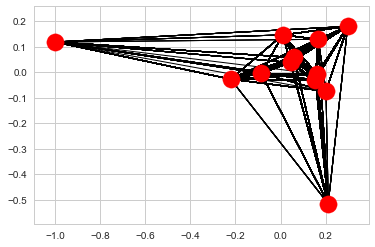

In [98]:
nx.draw_networkx(G, labels=True)

### Load from gexf file

In [143]:
g = load_graph_from_file()

## Measures

In [118]:
def convert_nx_output_to_dataframe(output, measure_label):
    """
    Networkx algorithms output a dictionary of results. 
    This converts them into a dataframe
    Example:
        dc = nx.degree_centrality(G)
        dc = convert_nx_output_to_dataframe(dc, 'degree_centrality')
    """
    j = []
    for r in output.keys():
        j.append({'term' : r, measure_label : output[r]})
    j = pd.DataFrame(j)
    j.set_index('term', inplace=True)
    return j

### Degree of nodes

In [132]:
d = nx.degree(g)
degree = pd.DataFrame([{ 'term' : term, 'degree': degree} for term, degree in d]).set_index('term')
degree

,degree
term,
crps,41920
migraine,232091
fibromyalgia,154869
spoonie,140859
vulvodynia,237
endometriosis,7444
neuropathy,10937
arthritis,200795
rhem_arthritis,30696


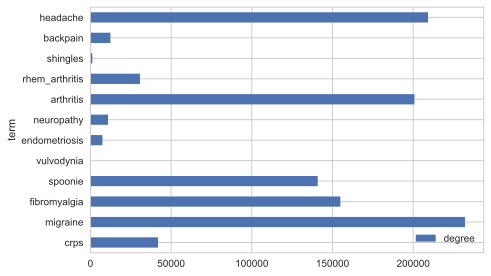

In [141]:
fig, axes = plt.subplots(figsize=(7, 4))
degree.plot(kind='barh', ax=axes)
fig.tight_layout()

### Degree centrality

In [137]:
degree_centrality = convert_nx_output_to_dataframe(nx.degree_centrality(g), 'degree_centrality')

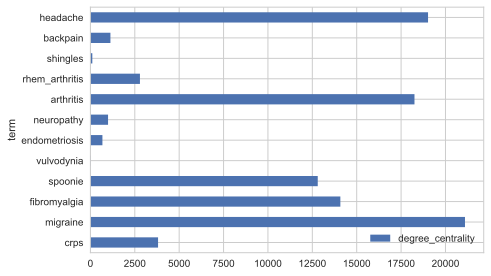

In [140]:
fig, axes = plt.subplots(figsize=(7, 4))
degree_centrality.plot(kind='barh', ax=axes)
fig.tight_layout()

In [106]:
nx.clustering(G)

NetworkXNotImplemented: not implemented for multigraph type

In [ ]:
%run -i GraphEditingTools.py
%run -i GraphTools.py



In [92]:
nx.to_dict_of_lists(G)

{'crps': ['migraine',
  'fibromyalgia',
  'spoonie',
  'vulvodynia',
  'endometriosis',
  'neuropathy',
  'arthritis',
  'rhem_arthritis',
  'shingles',
  'backpain',
  'headache'],
 'migraine': ['crps',
  'fibromyalgia',
  'spoonie',
  'vulvodynia',
  'endometriosis',
  'neuropathy',
  'arthritis',
  'rhem_arthritis',
  'shingles',
  'backpain',
  'headache'],
 'fibromyalgia': ['crps',
  'migraine',
  'spoonie',
  'vulvodynia',
  'endometriosis',
  'neuropathy',
  'arthritis',
  'rhem_arthritis',
  'shingles',
  'backpain',
  'headache'],
 'spoonie': ['crps',
  'migraine',
  'fibromyalgia',
  'vulvodynia',
  'endometriosis',
  'neuropathy',
  'arthritis',
  'rhem_arthritis',
  'shingles',
  'backpain',
  'headache'],
 'vulvodynia': ['crps',
  'migraine',
  'fibromyalgia',
  'spoonie',
  'endometriosis',
  'neuropathy',
  'arthritis',
  'rhem_arthritis',
  'shingles',
  'backpain',
  'headache'],
 'endometriosis': ['crps',
  'migraine',
  'fibromyalgia',
  'spoonie',
  'vulvodynia',
  

In [54]:
create_node_network('migraine', 'crps')

('migraine', 'crps', 1072)

In [43]:
b = load_tweet_id_data('migraine')
len(b)

549396

In [44]:
b[:3]

,idx,id
0,0,704128939367768065
1,1,395970820537077760
2,2,708327114613891072


In [45]:
c = load_tweet_id_data('crps')
len(c)

310139

In [26]:
len(d)

310139

In [49]:
c[:5]

,idx,id
0,0,392795224520785920
1,1,535951556987060225
2,2,391614509749895170
3,3,545970356478279680
4,4,529379014033801218


In [51]:
j = c[c.id.isin(b.id)]
len(j)

1072

In [52]:
j[:3]

,idx,id
331,331,564947260782309377
692,692,803742550196555776
737,737,621623141689860096


In [ ]:
 pos=nx.spring_layout(G)

In [8]:
experimentalTerms

0                                rsd
1                           c.r.p.s.
2                             r.s.d.
3     complex regional pain syndrome
4       reflex sympathetic dystrophy
5                           migraine
6                         migraineur
7                       fibromyalgia
8                              fibro
9                                 fm
10                               fms
11                           spoonie
12                        vulvodynia
13                        vulvadynia
14                     endometriosis
15                     endometriosis
16                        neuropathy
17                         arthritis
18                                oa
19                                ra
20                          shingles
21                               phn
22           post-herpetic neuralgia
23                         back pain
24                          backpain
25                          headache
Name: crps, dtype: object

In [8]:
experimentalTerms

0                                rsd
1                           c.r.p.s.
2                             r.s.d.
3     complex regional pain syndrome
4       reflex sympathetic dystrophy
5                           migraine
6                         migraineur
7                       fibromyalgia
8                              fibro
9                                 fm
10                               fms
11                           spoonie
12                        vulvodynia
13                        vulvadynia
14                     endometriosis
15                     endometriosis
16                        neuropathy
17                         arthritis
18                                oa
19                                ra
20                          shingles
21                               phn
22           post-herpetic neuralgia
23                         back pain
24                          backpain
25                          headache
Name: crps, dtype: object

In [28]:
d[1]

535951556987060225

# Temporal distribution of tweets with stored hashtags